<a href="https://colab.research.google.com/github/Naga-SDonepudi/PyTorch_HandsOn/blob/main/04_Computer_Vision_and_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision using PyTorch

### Libraries
* **torchvision** : base domain library with pre trained models for computer vision (consists of popular datasets, model architectures, and common image transformations for computer vision)
* Another different libraries are:
  * **torchvision.dataset**,
  * **torchvision.models**,
  * **torchvision.transforms**,
  * **torch.utils.data.Dataset**,
  * **torch.utils.data.DataLoader**

In [1]:
## Importing torch and torchvision
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

## Importing matplotlib for visualizing and plotting
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
print(torchvision.__version__)

2.9.0+cu126
0.24.0+cu126


### Aim is to build a computer vision model to find patterns in training data, and use the model to predict on test data
### 1. Loading a Dataset
* Importing a FashionMNIST dataset from torchvision.datasets
* The datasets found in torchvision.datasets are splitted to training and test sets

In [3]:
## Train Data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.43MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.82MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.7MB/s]


In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.2 Visulazing the data

Image Shape: torch.Size([1, 28, 28])


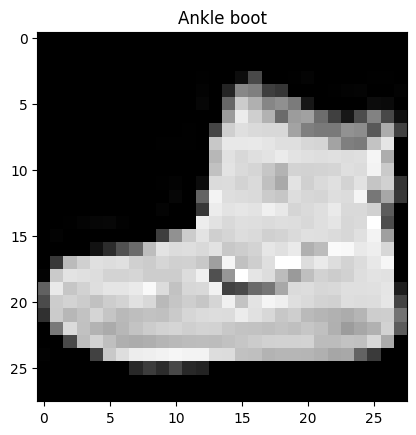

In [7]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")

plt.imshow(image.squeeze(), cmap="grey")
plt.title(class_names[label]);

In [8]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

### 2. Preparing DataLoader
* DataLoader turns the data into a Python iterbale.
* Turning the data into mini batches, which can be computationally efficient
* So breaking down to batch size of 44 common batch size is 32) ie 44 images/samples at a time
* By doing this, it gives the NN more chances to update its gradients per epoch

In [10]:
from torch.utils.data import DataLoader

# Setting up an hyperparameter of batch size
BATCH_SIZE = 44

# Turning dataset to iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e0a5d8d2540>,
 <torch.utils.data.dataloader.DataLoader at 0x7e0a5e477500>)

In [11]:
# Checking out whats going on
print(f"DataLoaders: {train_dataloader, test_dataloader}")

print(f"Length of the train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e0a5d8d2540>, <torch.utils.data.dataloader.DataLoader object at 0x7e0a5e477500>)
Length of the train dataloader: 1364 batches of 44
Length of test dataloader: 228 batches of 44


In [12]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([44, 1, 28, 28]), torch.Size([44]))

### 3. Building a baseline model
*  A baseline model is a simple model that gives a meaningfull performance refernce, and can be improved upon experiments
* Used a Flatten layer, which converts a multi-dim tensor to a 1D vector so that can be fed into a linear layer (which cant handle multi dimensional data)

In [13]:
# Started by creating a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]

# Flattening the sample
output = flatten_model(x)

print(f"Shape before Flattening: {x.shape}")
print(f"Shape after Flattening: {output.shape}")

Shape before Flattening: torch.Size([1, 28, 28])
Shape after Flattening: torch.Size([1, 784])


In [14]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [15]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_shape=784,
    hidden_units= 10,
    output_shape= len(class_names)
)
model_1.to("cpu")
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Setting up a Loss Function & Optimizer
* Loss Function: nn.CrossEntrophyLoss() for multi-class
* Optimizer: torch.optim.SGD()

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

## Evaluation Metric ie accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc
accuracy_fn

<function __main__.accuracy_fn(y_true, y_pred)>

In [18]:
loss_fn

CrossEntropyLoss()

In [19]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Creating a training loop
1. Loop through epochs
2. Loop through batches, perform training steps, calculate the train loss per batch
3. Loop through testing batch, perform testing steps, calculate the test loss per batch

In [20]:
## Importing tqdm for pregress bar
from tqdm.auto import tqdm

# Manual seed
torch.manual_seed(42)

# Setting up epochs
epochs = 4

# Training and tetsing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n")

  # Training, and adding a loop through training batches
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_1.train()

    ## Forward Pass
    y_pred = model_1(X)

    ## Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate the train loss

    ## Optimizer zero grad
    optimizer.zero_grad()

    ## Loss backward
    loss.backward()

    ## Optimizer step
    optimizer.step()

    ## Printing out whats goin on
    if batch % 300 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Dividing total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ## Testing Loop
  test_loss, test_acc = 0, 0
  model_1.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:

      ## Forward pass
      test_pred = model_1(X_test)

      ## Loss calculation
      loss = loss_fn(test_pred, y_test)
      test_loss += loss

      ## Accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculating the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculating the accuract average per batch
    test_acc /= len(test_dataloader)

  ## Printing out whats goin on
  print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}%")

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0

Looked at 0/60000 samples
Looked at 13200/60000 samples
Looked at 26400/60000 samples
Looked at 39600/60000 samples
Looked at 52800/60000 samples

Train Loss: 0.6057 | Test Loss: 0.5236, Test Acc: 81.6221%
Epoch: 1

Looked at 0/60000 samples
Looked at 13200/60000 samples
Looked at 26400/60000 samples
Looked at 39600/60000 samples
Looked at 52800/60000 samples

Train Loss: 0.4767 | Test Loss: 0.5006, Test Acc: 82.2468%
Epoch: 2

Looked at 0/60000 samples
Looked at 13200/60000 samples
Looked at 26400/60000 samples
Looked at 39600/60000 samples
Looked at 52800/60000 samples

Train Loss: 0.4526 | Test Loss: 0.4730, Test Acc: 83.3632%
Epoch: 3

Looked at 0/60000 samples
Looked at 13200/60000 samples
Looked at 26400/60000 samples
Looked at 39600/60000 samples
Looked at 52800/60000 samples

Train Loss: 0.4421 | Test Loss: 0.4627, Test Acc: 83.5859%


### 4. Making predictions, evaluation and getting results of model 1


* Before evaluating, defining a function for reusability
* if there are mutliple models, instead of writing evaluation code, we can just reuse the code using a function

In [21]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    Returns a dictionary containing the results of model predicting on data_loader.
    Arguments:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:

          ## Fowrad pass (predictions)
          y_pred = model(X)

          # Loss calculation and accuracy (accumulating)
          loss += loss_fn(y_pred, y)
          acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1))

        # Calculating the test loss and accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculating model 1 results on test dataset
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.46273303031921387,
 'model_acc': 83.58585858585863}

### 4.1 Performing the same evaluating and predicting results without a function

In [22]:
torch.manual_seed(42)

loss, acc = 0, 0
model_1.eval()
with torch.inference_mode():
  for X, y in test_dataloader:

    ## Fowrad pass (predictions)
    y_pred = model_1(X)

    # Loss calculation and accuracy (accumulating)
    loss += loss_fn(y_pred, y)
    acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

  # Calculating the test loss and accuracy per batch
  loss /= len(test_dataloader)
  acc /= len(test_dataloader)

print(f"Model: {model_1.__class__.__name__}")
print(f"Final Test Loss: {loss.item():.4f}")
print(f"Final Test Acc: {acc:.2f}%")

Model: FashionMNISTModelV1
Final Test Loss: 0.4627
Final Test Acc: 83.59%


In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [24]:
device

'cuda'

## 5. Buidling a better model (model_2) with Non-linearity
* Creating a model with Linear and Non-linear layers

In [25]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(), #Flattens the inputs from multi dim to single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [26]:
# Creating an instnace of model
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=784, # From flatten layer output (28 * 28)
                              hidden_units=10,
                              output_shape=len(class_names))

model_2.to(device)
next(model_2.parameters()).device

device(type='cuda', index=0)

In [27]:
model_2

FashionMNISTModelV2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### Loss function, optimizer and accuracy function

In [28]:
# Loss function measures how wrong the model is
loss_fn = nn.CrossEntropyLoss()

# Updates the model params to
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)
# Accuracy Metric
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

### Creating a training loop and testing loop
* Creating functions for training loop and testing loop ie **train_mode** and **test_mode**

In [29]:
def train_mode(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
  """
  The above function performs a training step by learning from dataloader
  """
  ## Setting up train_loss and accuracy to 0
  train_loss, train_acc = 0, 0
  model.train()

  ## Adding a loop to loop through training batches
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    ## Forward Pass (raw logits will be the outputs)
    y_pred = model(X)

    ## Loss Calculation, accuracy and Accumulating the train loss, accuracy
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    ## Optimizer zero grad
    optimizer.zero_grad()

    ## Backward loss
    loss.backward()

    ## Optimizer step
    optimizer.step()

  # Dividing total train loss and accuracy by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Training Loss: {train_loss:.4f} | Training Accuracy: {train_acc:.2f}%")

### Testing Loop

In [30]:
def test_mode(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
  """
  Perofrms a testing step
  """
  test_loss, test_acc = 0, 0
  ## Putting the model in eval mode
  model.eval()

  ## Turning on inference mode
  with torch.inference_mode():
    for X, y in data_loader:

      # Target device
      X, y = X.to(device), y.to(device)

      ## Forward Pass
      test_pred = model(X)

      ## Loss calculation, accuracy and accumulating
      test_loss += loss_fn(test_pred, y).item()
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Adjusting metrics
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Testing Loss: {test_loss:.4f} | Testing Accuracy: {test_acc:.2f}%")

    return test_loss, test_acc

In [31]:
torch.manual_seed(42)

# Epochs
epochs = 4

## Creating an optimization and eval loop using train_mode() and test_mode()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n")

  train_mode(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_mode(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0

Training Loss: 1.1057 | Training Accuracy: 61.13%
Testing Loss: 0.9523 | Testing Accuracy: 65.11%
Epoch: 1

Training Loss: 0.9270 | Training Accuracy: 66.11%
Testing Loss: 0.9354 | Testing Accuracy: 65.85%
Epoch: 2

Training Loss: 0.8869 | Training Accuracy: 67.07%
Testing Loss: 0.8944 | Testing Accuracy: 66.67%
Epoch: 3

Training Loss: 0.8680 | Training Accuracy: 67.73%
Testing Loss: 0.8872 | Testing Accuracy: 66.69%


## Convolutional Neural Network
* CNNs are built for images, and instead of looking at the whole image at once, it looks at small patches, learns patterns and builds them up into more complex features.
* Convolutions learn patterns like edges, corners from visual data.
* Conv Layers has learned kernels(weights), which extracts features from input image that distinguishes inages from one another
* Also known as ConvNets
### Architecture:
* Input Layer
* Convolution Layer
* Hidden Layer
* Pooling Layer
* Output Layer
### Hyperparams in conv ayer:
* kernel_size: A kernel/filter is a small matrix that slides over the image and extracts features (3 x 3 most common kernel size)
* stride: stride is how many pixels the kernel moves each step
* padding: padding adds extra pixels (usually zeros) around the image border


### 6. Building model 3 ie Convolutional Neural Network

In [34]:
# Creating a CNN
class FashionMNISTModelV3(nn.Module):
  """
  Using a TinyVGG CNN Architecture
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    return x

In [38]:
## Instantiating the cnn model
model_3 = FashionMNISTModelV3(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

### 6.1 whats going inside *nn.Conv2d()*

In [ ]:
torch.manual_seed(42)

